<a href="https://colab.research.google.com/github/sanjayjoker7/INTERN_TASKS_ELEVATE/blob/main/TASK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Required Libraries
!pip install seaborn pandas matplotlib --quiet


In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Load Dataset  (Titanic train.csv)
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [4]:
#Basic Info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (891, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [6]:
#Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Value_count for survived
print("\nValue Counts for 'Survived':")
print(df['Survived'].value_counts())


Value Counts for 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64


• 	549 passengers died (did not survive)

• 	342 passengers survived

• 	This gives us a quick overview of the class imbalance in the dataset — more people died than survived.

In [8]:
#Statistical Summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


📊 Key Insights from Titanic Statistical Summary

1. Survival Rate

• 	Mean = 0.38 → About 38% of passengers survived, confirming a class imbalance.

• 	Binary column: 0 = died, 1 = survived.

2. Age

• 	Mean Age ≈ 29.7, Max = 80, Min = 0.42 → Wide age range, with some infants and elderly passengers.

• 	Missing values: Only 714 out of 891 entries are non-null → You’ll need to impute or handle missing ages.

3. Fare

• 	Mean Fare ≈ ₹32.20, but Max = ₹512.33 → Huge variation, likely due to class and cabin type.

• 	Std Dev ≈ ₹49.69 → Indicates presence of outliers (e.g., wealthy passengers in 1st class).

4. Pclass (Passenger Class)
• 	Mean ≈ 2.31, Median = 3 → Most passengers were
in 3rd class.

• 	Std Dev ≈ 0.83 → Reasonable spread across classes.

5. SibSp (Siblings/Spouses aboard)

• 	Mean ≈ 0.52, Max = 8 → Most passengers traveled alone or with one companion.

• 	75% of passengers had ≤ 1 sibling/spouse aboard.

6. Parch (Parents/Children aboard)

• 	Mean ≈ 0.38, Max = 6 → Similar to SibSp, most passengers had few or no family aboard.


**🧹 Data Cleaning**




In [9]:
# Fill missing age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill embark with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Drop cabin (Too many missing values)
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-1512251924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1512251924.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [10]:
# checkhing data is cleaned or not
#Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **Univariate Analysis**


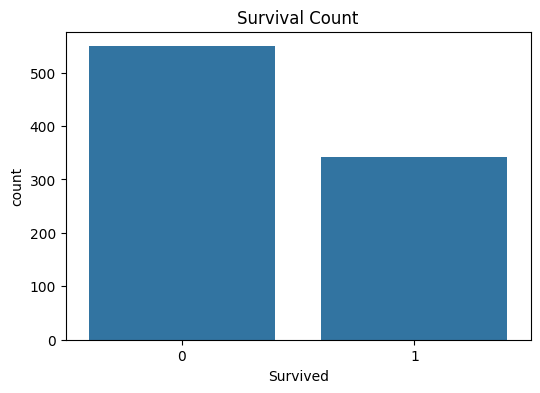

In [11]:
#Univariate Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

**Observation**:

• 	Over 500 passengers did not survive (Survived = 0)

• 	Just over 300 passengers survived (Survived = 1)

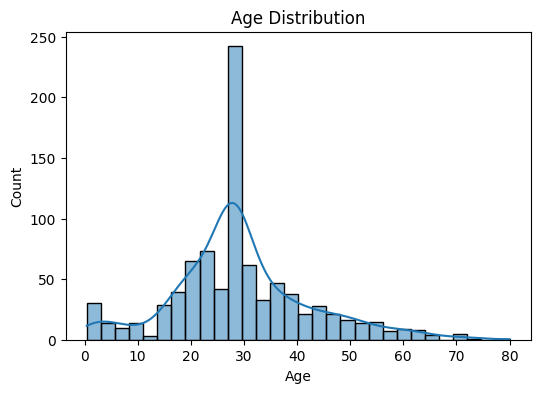

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

🔍 **Observations**

• 	The peak age is around 30 years, with the highest passenger count just above 250.

• 	The distribution is right-skewed, meaning there are more younger passengers than older ones.

• 	There are passengers as young as 0.42 years (infants) and as old as 80 years.

• 	The density curve smooths out the histogram, showing the overall shape of the distribution.

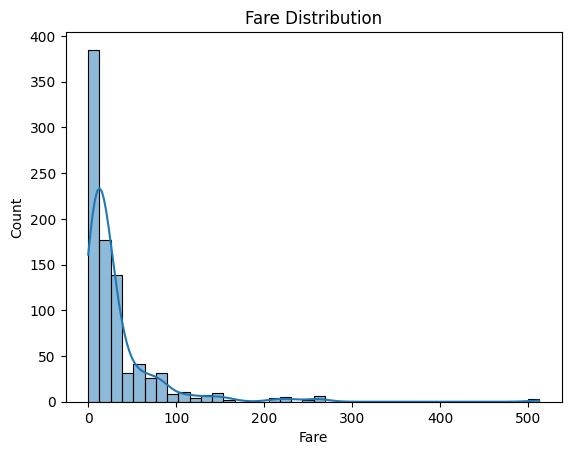

In [13]:
# Fare distribution
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Fare Distribution')
plt.show()



🔍 **Observations**

• 	The distribution is heavily right-skewed: most passengers paid low fares, with a sharp peak near the minimum.

• 	A few passengers paid extremely high fares (up to ₹500+), likely first-class travelers.

• 	The density curve helps visualize the long tail of high-paying passengers.

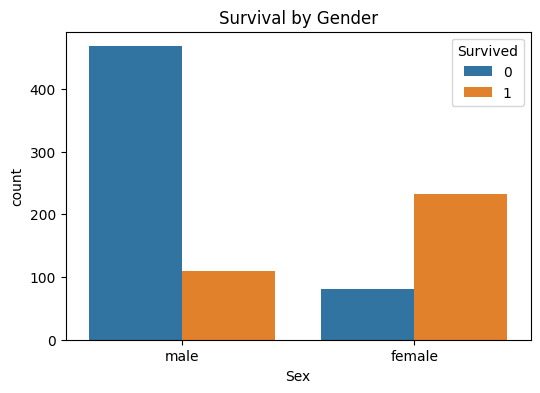

In [14]:
#Bivariate Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

🔍 **Observations**

• 	Females had a much higher survival rate than males.

• 	Suggests gender played a significant role in evacuation priority.


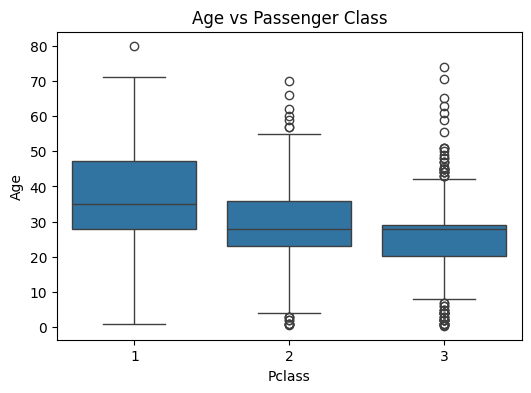

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age vs Passenger Class")
plt.show()

🔍 Observations

• 	First-class passengers were older on average.

• 	Third-class had the youngest median age and more outliers.

• 	Indicates possible socioeconomic stratification by age.


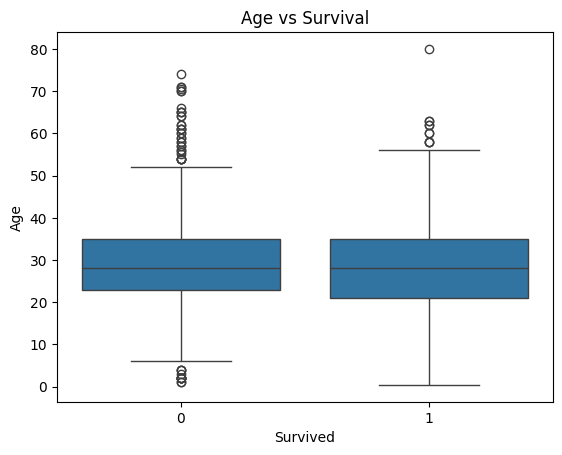

In [16]:
# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()



🔍 Observations

• 	Median age is similar across survival groups (~30).

• 	Survivors had a slightly narrower age spread.

• 	No strong age-based survival bias, but young children may have had better odds.

# **Multivariate Analysis**

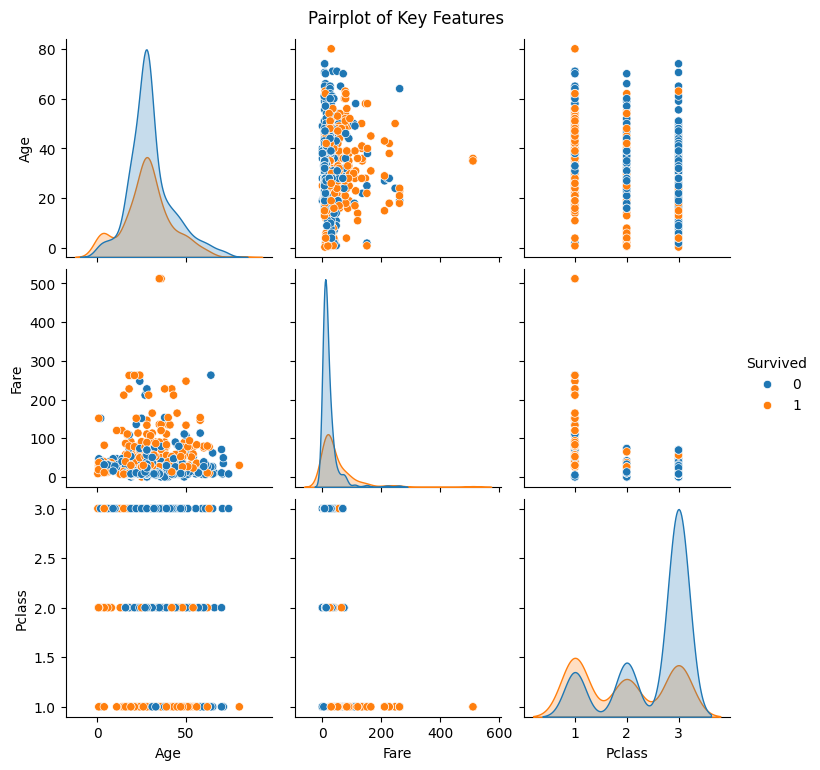

In [17]:
# Pairplot
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()



🧠 Observations

• 	Fare vs Pclass: Strong inverse relationship—higher fares are tightly clustered in Pclass 1.

• 	Age vs Pclass: Older passengers are more concentrated in Pclass 1, while younger ones are spread across all classes.

• 	Survival patterns:

• 	Survivors tend to cluster around higher fares and lower Pclass numbers.

• 	No strong survival bias by age alone, but extreme ages (very young or very old) show some survival presence.

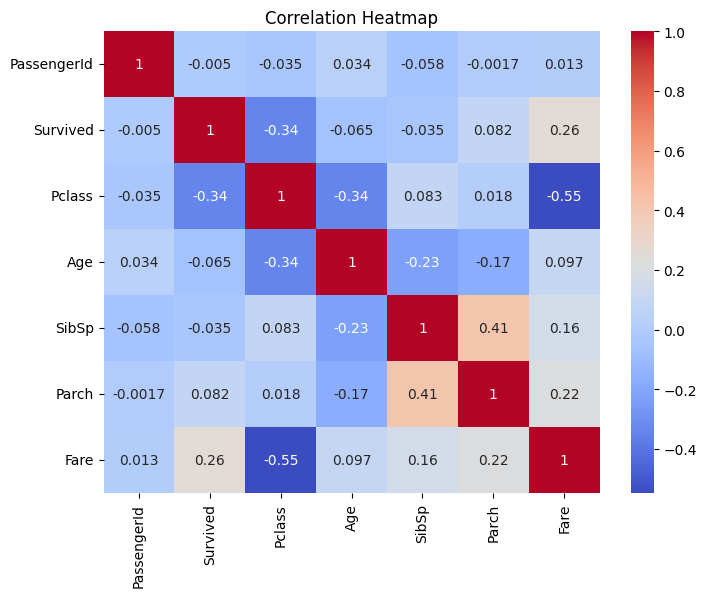

In [18]:
#Multivariate Analysis
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

🧠 Observations

• 	Fare and Pclass are your strongest predictors.

• 	Age, SibSp, Parch have weaker correlations individually, but may be useful when engineered into new features (e.g., , , ).

In [19]:
#Key Insights
print("\n📌 Key Insights:")

print("-. Fare has a positive correlation with survival.")

print("-. Younger passengers were more common in 3rd class.")

print("- Survival rate is approximately 38%, indicating class imbalance in the target variable.")

print("- Females had a significantly higher survival rate than males, suggesting gender influenced evacuation priority.")
print("- First-class passengers were more likely to survive than those in second or third class.")
print("- Fare distribution is heavily right-skewed; higher fares are associated with higher survival odds.")
print("- Age distribution peaks around 30 years, with a wide range from infants to elderly passengers.")
print("- Age vs Survival shows no strong bias, but young children may have had better survival chances.")
print("- Age vs Pclass reveals older passengers were concentrated in first class, while younger ones were spread across all classes.")
print("- Pairplot confirms that higher survival rates are linked to higher fares and lower Pclass numbers.")
print("- Correlation heatmap shows strong negative correlation between Pclass and Fare (-0.55), and moderate positive correlation between Fare and Survival (+0.26).")
print("- SibSp and Parch are moderately correlated (+0.41), suggesting families often traveled together.")
print("- Missing values in Age and Embarked need to be handled before modeling.")
print("- Outliers in Fare may require transformation or binning for better model performance.")



📌 Key Insights:
-. Fare has a positive correlation with survival.
-. Younger passengers were more common in 3rd class.
- Survival rate is approximately 38%, indicating class imbalance in the target variable.
- Females had a significantly higher survival rate than males, suggesting gender influenced evacuation priority.
- First-class passengers were more likely to survive than those in second or third class.
- Fare distribution is heavily right-skewed; higher fares are associated with higher survival odds.
- Age distribution peaks around 30 years, with a wide range from infants to elderly passengers.
- Age vs Survival shows no strong bias, but young children may have had better survival chances.
- Age vs Pclass reveals older passengers were concentrated in first class, while younger ones were spread across all classes.
- Pairplot confirms that higher survival rates are linked to higher fares and lower Pclass numbers.
- Correlation heatmap shows strong negative correlation between Pclas